In [2]:
%pylab inline 

import pandas as pd
import numpy as np
import seaborn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn import linear_model 

%config InlineBackend.figure_format = 'svg'
seaborn.set_style("white")

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# First I'll do the analysis for non-normalized data, then for normalized

In [3]:
np_df = pd.read_csv('DATAWNEWVARS.csv')

In [4]:
np_df = np_df.dropna()

In [6]:
#np_df.corr()
#seaborn.heatmap(np_df.corr(), annot=True); 

In [8]:
# This is my actual model
y, X = patsy.dmatrices('VISITORS ~ SMLY + LSTYRTOTAL + CHTYR + MONTH', data=np_df, return_type="dataframe")

X.head()

,Intercept,MONTH[T.AUG],MONTH[T.DEC],MONTH[T.FEB],MONTH[T.JAN],MONTH[T.JUL],MONTH[T.JUN],MONTH[T.MAR],MONTH[T.MAY],MONTH[T.NOV],MONTH[T.OCT],MONTH[T.SEP],SMLY,LSTYRTOTAL,CHTYR
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27204.0,1415867.0,58954.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34786.0,1356913.0,119682.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28663.0,1237231.0,-27028.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23824.0,1264259.0,115707.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21735.0,1148552.0,99374.0


In [9]:
# Create your model
model = sm.OLS(y,X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               VISITORS   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 3.563e+04
Date:                Mon, 23 Jul 2018   Prob (F-statistic):               0.00
Time:                        16:09:54   Log-Likelihood:            -2.8654e+05
No. Observations:               25154   AIC:                         5.731e+05
Df Residuals:                   25139   BIC:                         5.732e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -4.487e+04   1480.611    -30.307      0.000   -4.78e+04    -4.2e+04
MONTH[T.AUG]  2.667e+05   1312.910    203.144      0.000    2.64e+05    2.69e+05
MONTH[T.DEC] -5703.8519    661.177     -8.627      0.000   -6999.797   -4407.907
MONTH[T.FEB] -8934.2030    665.759    -13.420      0.000   -1.02e+04   -7629.276
MONTH[T.JAN] -4828.4079    665.146     -7.259      0.000   -6132.132   -3524.684
MONTH[T.JUL]  2.422e+05   1221.026    198.375      0.000     2.4e+05    2.45e+05
MONTH[T.JUN]  1.305e+05    861.991    151.424      0.000    1.29e+05    1.32e+05
MONTH[T.MAR] -5461.2960    661.045     -8.262      0.000   -6756.983   -4165.609
MONTH[T.MAY]  4.003e+04    681.692     58.726      0.000    3.87e+04    4.14e+04
MONTH[T.NOV]  1.415e+04    663.313     21.334      0.000    1.29e+04    1.55e+04
MONTH[T.OCT]  5.567e+04    702.033     79.303      0.000    5.43e+04     5.7e+04
MONTH[T.SEP]  1.429e+05    897.271    159.266      0.000    1.41e+05    1.45e+05
SMLY            -0.0067      0.004     -1.523      0.128      -0.015       0.002
LSTYRTOTAL       0.0623      0.001     55.014      0.000       0.060       0.064
CHTYR            0.0012      0.002      0.769      0.442      -0.002       0.004
==============================================================================
Omnibus:                     7406.353   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53637.507
Skew:                           1.223   Prob(JB):                         0.00
Kurtosis:                       9.722   Cond. No.                     2.12e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Now for normalized

In [17]:
np_df_norm = pd.read_csv('NORMALIZED_DATA.csv')

In [19]:
#np_df_norm

In [20]:
y, X = patsy.dmatrices('VISITORS ~ LSTYRTOTAL + CHTYR + FEB + MAR + APR + MAY + JUN + JUL + AUG + SEP + OCT + NOV + DEC', data=np_df_norm, return_type="dataframe")

X.head()

,Intercept,LSTYRTOTAL,CHTYR,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1.0,1.147668,0.618496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.700108,1.250710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,-0.208479,-0.276626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,-0.003291,1.209328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,-0.881701,1.039292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               VISITORS   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 2.018e+04
Date:                Mon, 23 Jul 2018   Prob (F-statistic):               0.00
Time:                        16:20:11   Log-Likelihood:                -4932.6
No. Observations:               24930   AIC:                             9893.
Df Residuals:                   24916   BIC:                         1.001e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7884      0.007   -121.064      0.000      -0.801      -0.776
LSTYRTOTAL     0.0830      0.002     41.501      0.000       0.079       0.087
CHTYR          0.0015      0.002      0.772      0.440      -0.002       0.005
FEB           -0.0362      0.009     -3.930      0.000      -0.054      -0.018
MAR            0.0013      0.009      0.141      0.888      -0.017       0.019
APR            0.0927      0.009     10.129      0.000       0.075       0.111
MAY            0.5530      0.009     60.423      0.000       0.535       0.571
JUN            1.4935      0.009    163.193      0.000       1.476       1.511
JUL            2.5371      0.009    277.224      0.000       2.519       2.555
AUG            2.6299      0.009    287.365      0.000       2.612       2.648
SEP            1.4081      0.009    153.855      0.000       1.390       1.426
OCT            0.5719      0.009     62.489      0.000       0.554       0.590
NOV            0.1733      0.009     18.934      0.000       0.155       0.191
DEC           -0.0067      0.009     -0.716      0.474      -0.025       0.012
==============================================================================
Omnibus:                     5065.041   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54011.602
Skew:                           0.670   Prob(JB):                         0.00
Kurtosis:                      10.085   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# The next few cells are how I originally ran the regression, with 60+ dummies for parknames and months.

# The rest is some data exploration as I tried to figure out the best way to represent the months in my regression

In [9]:
# How I originally ran the regression, with each park as an input
y, X = patsy.dmatrices('VISITORS ~ LSTYRTOTAL + CHTYR + MONTH + PARKNAME',
                       data=np_df, return_type="dataframe")

X.head()

,Intercept,MONTH[T.AUG],MONTH[T.DEC],MONTH[T.FEB],MONTH[T.JAN],MONTH[T.JUL],MONTH[T.JUN],MONTH[T.MAR],MONTH[T.MAY],MONTH[T.NOV],...,PARKNAME[T.Shenandoah NP],PARKNAME[T.Theodore Roosevelt NP],PARKNAME[T.Virgin Islands NP],PARKNAME[T.Voyageurs NP],PARKNAME[T.Wind Cave NP],PARKNAME[T.Yellowstone NP],PARKNAME[T.Yosemite NP],PARKNAME[T.Zion NP],LSTYRTOTAL,CHTYR
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1415867.0,58954.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1356913.0,119682.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1237231.0,-27028.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1264259.0,115707.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1148552.0,99374.0


In [10]:
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               VISITORS   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     7751.
Date:                Mon, 23 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:14:07   Log-Likelihood:            -2.8941e+05
No. Observations:               25379   AIC:                         5.789e+05
Df Residuals:                   25315   BIC:                         5.795e+05
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                   -3.173e+04   1543.353    -20.560      0.000   -3.48e+04   -2.87e+04
MONTH[T.AUG]                                  2.65e+05    669.259    395.969      0.000    2.64e+05    2.66e+05
MONTH[T.DEC]                                -5663.3213    669.339     -8.461      0.000   -6975.264   -4351.378
MONTH[T.FEB]                                -7918.5834    665.767    -11.894      0.000   -9223.526   -6613.641
MONTH[T.JAN]                                -3624.8869    665.783     -5.445      0.000   -4929.859   -2319.915
MONTH[T.JUL]                                 2.407e+05    669.259    359.673      0.000    2.39e+05    2.42e+05
MONTH[T.JUN]                                 1.297e+05    669.259    193.767      0.000    1.28e+05    1.31e+05
MONTH[T.MAR]                                -5425.7949    669.259     -8.107      0.000   -6737.582   -4114.008
MONTH[T.MAY]                                 3.977e+04    669.259     59.422      0.000    3.85e+04    4.11e+04
MONTH[T.NOV]                                 1.406e+04    669.259     21.006      0.000    1.27e+04    1.54e+04
MONTH[T.OCT]                                 5.532e+04    669.259     82.656      0.000     5.4e+04    5.66e+04
MONTH[T.SEP]                                  1.42e+05    669.259    212.148      0.000    1.41e+05    1.43e+05
PARKNAME[T.Arches NP]                         8.26e-07   1001.751   8.25e-10      1.000   -1963.489    1963.489
PARKNAME[T.Badlands NP]                      8.728e-07   1001.751   8.71e-10      1.000   -1963.489    1963.489
PARKNAME[T.Big Bend NP]                      8.389e-07   1226.889   6.84e-10      1.000   -2404.773    2404.773
PARKNAME[T.Biscayne NP]                     -8.689e-07   1226.889  -7.08e-10      1.000   -2404.773    2404.773
PARKNAME[T.Black Canyon of the Gunnison NP] -1.475e-05   1226.889   -1.2e-08      1.000   -2404.773    2404.773
PARKNAME[T.Bryce Canyon NP]                 -2.213e-06   1226.889   -1.8e-09      1.000   -2404.773    2404.773
PARKNAME[T.Canyonlands NP]                   1.815e-06   1226.889   1.48e-09      1.000   -2404.773    2404.773
PARKNAME[T.Capitol Reef NP]                  1.087e-06   1226.889   8.86e-10      1.000   -2404.773    2404.773
PARKNAME[T.Carlsbad Caverns NP]              2.611e-06   1226.889   2.13e-09      1.000   -2404.773    2404.773
PARKNAME[T.Channel Islands NP]               2.301e-06   1226.889   1.88e-09      1.000   -2404.773    2404.773
PARKNAME[T.Congaree NP]                      6.259e-07   1226.889    5.1e-10      1.000   -2404.773    2404.773
PARKNAME[T.Crater Lake NP]                   4.726e-07   1226.889   3.85e-10      1.000   -2404.773    2404.773
PARKNAME[T.Cuyahoga Valley NP]               2.057e-06   12

# Exploring the Month variable

In [6]:
data_x = np_df['MONTH']
data_y = np_df['VISITORS']

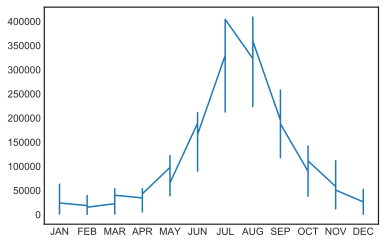

In [43]:
plt.plot(data_x, data_y)

In [48]:
new_np_df = np_df.groupby('MONTH', as_index=False)['VISITORS'].mean()

In [1]:
#new_np_df

In [57]:
new_np_df = new_np_df.sort_values(by='MONTH')

In [58]:
data_x1 = new_np_df['MONTH']
data_y1 = new_np_df['VISITORS']

([<matplotlib.axis.XTick at 0x1c18dc2780>,
 <a list of 12 Text xticklabel objects>)

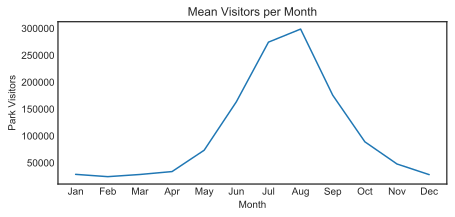

In [87]:
import numpy as np
figure(figsize=(7,3))
ax = plt.plot(data_x1, data_y1)
yaxis = plt.ylabel('Park Visitors')
xlabel('Month')
plt.title("Mean Visitors per Month")
plt.xticks(np.arange(1,13,1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

In [90]:
# Trying a polynomial for Month_N, where each month is a number 1-12
y, X = patsy.dmatrices('VISITORS ~ SMLY + LSTYRTOTAL + CHTYR + MONTH_N + np.power(MONTH_N,2)', data=np_df, return_type="dataframe")

X.head()

,Intercept,SMLY,LSTYRTOTAL,CHTYR,MONTH_N,"np.power(MONTH_N, 2)"
0,1.0,27204.0,1415867.0,58954.0,1.0,1.0
1,1.0,34786.0,1356913.0,119682.0,1.0,1.0
2,1.0,28663.0,1237231.0,-27028.0,1.0,1.0
3,1.0,23824.0,1264259.0,115707.0,1.0,1.0
4,1.0,21735.0,1148552.0,99374.0,1.0,1.0


In [91]:
# Create your model
model = sm.OLS(y,X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               VISITORS   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                 3.278e+04
Date:                Wed, 18 Jul 2018   Prob (F-statistic):               0.00
Time:                        16:53:44   Log-Likelihood:            -3.0211e+05
No. Observations:               25379   AIC:                         6.042e+05
Df Residuals:                   25373   BIC:                         6.043e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2.543e+04   2291.295    -11.099      0.000   -2.99e+04   -2.09e+04
SMLY                     0.8299      0.003    258.279      0.000       0.824       0.836
LSTYRTOTAL               0.0002      0.002      0.104      0.918      -0.003       0.003
CHTYR                    0.0029      0.002      1.817      0.069      -0.000       0.006
MONTH_N               1.701e+04    391.478     43.458      0.000    1.62e+04    1.78e+04
np.power(MONTH_N, 2) -1198.2783     28.528    -42.004      0.000   -1254.195   -1142.362
==============================================================================
Omnibus:                    23557.539   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1659670.703
Skew:                           4.295   Prob(JB):                         0.00
Kurtosis:                      41.674   Cond. No.                     1.30e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""